In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.stats import linregress
import numpy as np
from scipy import stats
import seaborn as sns

In [39]:
# Create a DataFrame with csv file
file = r'C:\Users\Ana Torres\Documents\UofT\Challenges\Project\United_States_COVID-19.csv'
data_df = pd.read_csv(file, infer_datetime_format=True, parse_dates=True)
data_df.set_index("submission_date", inplace=True)
data_df.sort_index(inplace=True)
data_df.head()

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,,
01/01/2021,FL,1327296,NaN,NaN,9697,1580.0,23444,NaN,NaN,155,12.0,01/01/2021 12:00:00 AM,Not agree,Not agree
01/01/2021,MA,375178,359445.0,15733.0,0,0.0,12677,12409.0,268.0,64,1.0,01/03/2021 12:00:00 AM,Agree,Agree
01/01/2021,PR,80111,75356.0,4755.0,253,19.0,1515,1262.0,253.0,0,0.0,01/01/2021 12:00:00 AM,Agree,Agree
01/01/2021,AR,229442,NaN,NaN,4304,1519.0,3711,NaN,NaN,35,17.0,01/02/2021 02:50:51 PM,Not agree,Not agree
01/01/2021,IN,517998,NaN,NaN,6300,0.0,8346,8038.0,308.0,110,3.0,01/01/2021 12:00:00 AM,Not agree,Agree


In [40]:
# Create a copy of DataFrame with columns we need
reduced_data_df = data_df[["state", "tot_cases", "new_case"]].copy()
reduced_data_df.head()

,state,tot_cases,new_case
submission_date,,,
01/01/2021,FL,1327296,9697
01/01/2021,MA,375178,0
01/01/2021,PR,80111,253
01/01/2021,AR,229442,4304
01/01/2021,IN,517998,6300


In [41]:
# List of Regions 
West = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "CO", "AZ", "NM"]
Mid_West = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
North_East = ["ME", "NH", "VT", "MA", "CT", "RMI", "NY", "PA", "NJ"]
South = ["TX", "OK", "AR", "LA", "MS", "TN", "KY", "AL", "FL", "GA", "SC", "NC", "VA", "WV", "DC", "MD", "DE"]

reduced_data_df["Region"] = reduced_data_df["state"].apply(lambda x: "West" if x in West else
                                                          ("Mid_West" if x in Mid_West else
                                                          ("North_East" if x in North_East else
                                                          ("South" if x in South else np.nan))))
reduced_data_df

,state,tot_cases,new_case,Region
submission_date,,,,
01/01/2021,FL,1327296,9697,South
01/01/2021,MA,375178,0,North_East
01/01/2021,PR,80111,253,NaN
01/01/2021,AR,229442,4304,South
01/01/2021,IN,517998,6300,Mid_West
...,...,...,...,...
12/31/2021,GU,19618,11,NaN
12/31/2021,CT,510188,0,North_East
12/31/2021,MA,1140614,22703,North_East


In [42]:
# Getting Month and Year 
reduced_data_df['Year'] = pd.to_datetime(reduced_data_df.index).year
reduced_data_df['Month'] = pd.to_datetime(reduced_data_df.index).month

reduced_data_df.head()

,state,tot_cases,new_case,Region,Year,Month
submission_date,,,,,,
01/01/2021,FL,1327296,9697,South,2021,1
01/01/2021,MA,375178,0,North_East,2021,1
01/01/2021,PR,80111,253,NaN,2021,1
01/01/2021,AR,229442,4304,South,2021,1
01/01/2021,IN,517998,6300,Mid_West,2021,1


In [43]:
# Dividing each region into sepereate DataFrames
West_data = reduced_data_df.loc[(reduced_data_df["Region"] == "West")]
Mid_West_data = reduced_data_df.loc[(reduced_data_df["Region"] == "Mid_West")]
South_data = reduced_data_df.loc[(reduced_data_df["Region"] == "South")]
North_East_data = reduced_data_df.loc[(reduced_data_df["Region"] == "North_East")]

Mid_West_data.tail()

,state,tot_cases,new_case,Region,Year,Month
submission_date,,,,,,
12/31/2021,OH,2016095,20598,Mid_West,2021,12
12/31/2021,ND,174626,451,Mid_West,2021,12
12/31/2021,MN,1022212,0,Mid_West,2021,12
12/31/2021,MI,1710271,0,Mid_West,2021,12
12/31/2021,SD,179204,0,Mid_West,2021,12


## Exploratory Data Analysis (EDA)

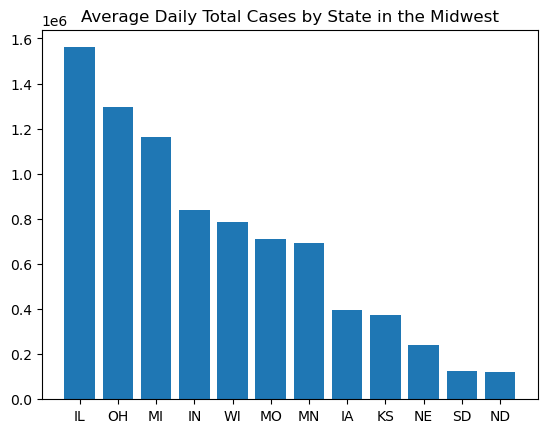

In [58]:
# Mid West Region
mean_cases_by_state = Mid_West_data.groupby("state").mean(numeric_only=True)[["tot_cases"]].reset_index().sort_values("tot_cases", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["tot_cases"])
plt.title("Average Daily Total Cases by State in the Midwest")
plt.savefig("bar_chart.png")
plt.show()

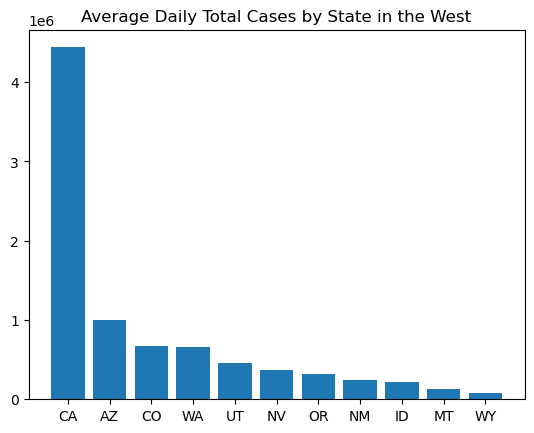

In [59]:
# West Region

mean_cases_by_state = West_data.groupby("state").mean(numeric_only=True)[["tot_cases"]].reset_index().sort_values("tot_cases", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["tot_cases"])
plt.title("Average Daily Total Cases by State in the West")
plt.savefig("bar_chart.png")
plt.show()

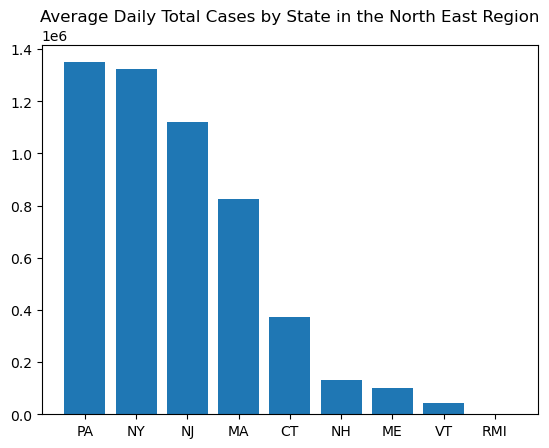

In [61]:
# North Region

mean_cases_by_state = North_East_data.groupby("state").mean(numeric_only=True)[["tot_cases"]].reset_index().sort_values("tot_cases", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["tot_cases"])
plt.title("Average Daily Total Cases by State in the North East Region")
plt.savefig("bar_chart.png")
plt.show()


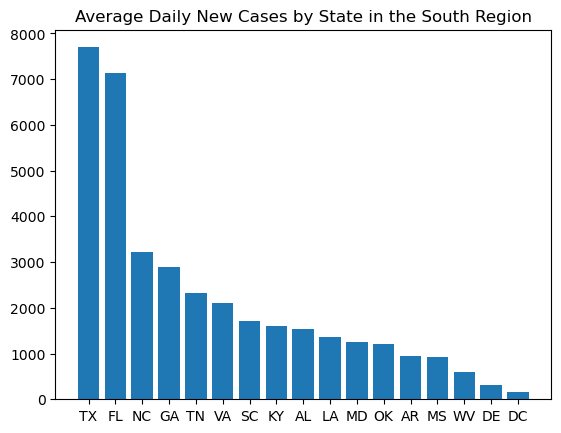

In [62]:
# South Region

mean_cases_by_state = South_data.groupby("state").mean(numeric_only=True)[["new_case"]].reset_index().sort_values("new_case", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["new_case"])
plt.title("Average Daily New Cases by State in the South Region")
plt.savefig("bar_chart.png")
plt.show()

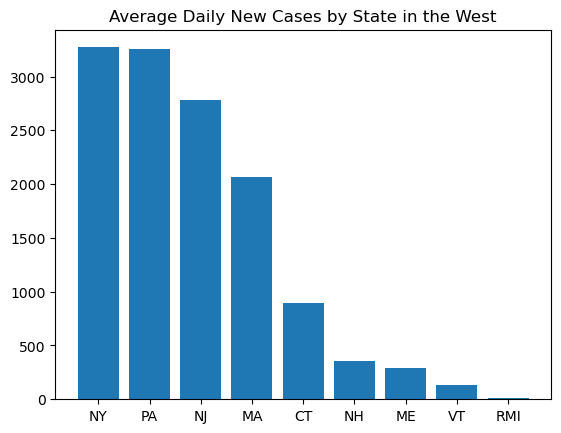

In [63]:
# North Region

mean_cases_by_state = North_East_data.groupby("state").mean(numeric_only=True)[["new_case"]].reset_index().sort_values("new_case", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["new_case"])
plt.title("Average Daily New Cases by State in the West")
plt.savefig("bar_chart.png")
plt.show()


In [49]:
mean_cases_by_state = reduced_data_df.groupby("state").mean()[["new_case"]].reset_index().sort_values("new_case", ascending=False)
mean_cases_by_state["region"] = mean_cases_by_state["state"].apply(lambda x: "West" if x in West else
                                                          ("Mid_West" if x in Mid_West else
                                                          ("North_East" if x in North_East else
                                                          ("South" if x in South else np.nan))))

mean_cases_by_state.head()

C:\Users\Ana Torres\AppData\Local\Temp\ipykernel_23676\2390527748.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_cases_by_state = reduced_data_df.groupby("state").mean()[["new_case"]].reset_index().sort_values("new_case", ascending=False)


,state,new_case,region
5,CA,11120.866134,West
51,TX,7696.468531,South
10,FL,7138.694306,South
17,IL,3785.746254,Mid_West
38,NY,3271.859141,North_East


In [50]:
def get_corr_by_state(state):
    try:
        if state in list(data_df["state"]):
            corr = data_df[data_df["state"]==state].select_dtypes("number").corr()
            matrix = np.triu(corr)
            sns.heatmap(corr, annot=True, mask=matrix)
            plt.savefig("heatmap.png")
        else:
            print(f"State {state} not valid.")
    except:
        pass
    

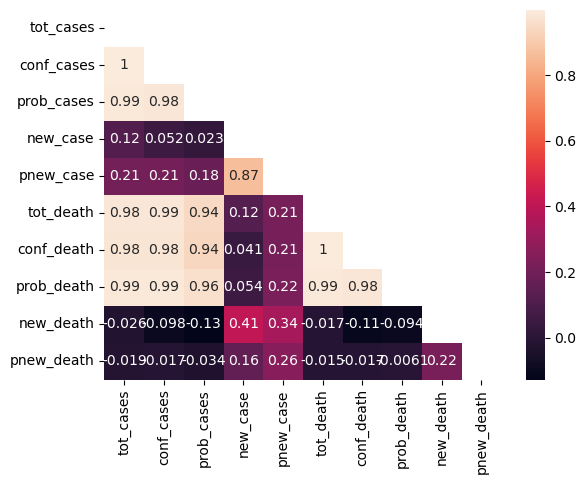

In [51]:
get_corr_by_state("AZ")

In [52]:
def get_corr_by_region(region):
    
    data_df["region"] = data_df["state"].apply(lambda x: "West" if x in West else
                                                          ("Mid_West" if x in Mid_West else
                                                          ("North_East" if x in North_East else
                                                          ("South" if x in South else np.nan))))
    try:
        if region in list(data_df["region"]):
            corr = data_df[data_df["region"]==region].select_dtypes("number").corr()
            matrix = np.triu(corr)
            sns.heatmap(corr, annot=True, mask=matrix)
            plt.savefig("heatmap.png")
        else:
            print(f"Region {region} not valid. Please select a region from the following list: West, Mid_West, North_East, South. ")
    except:
        pass

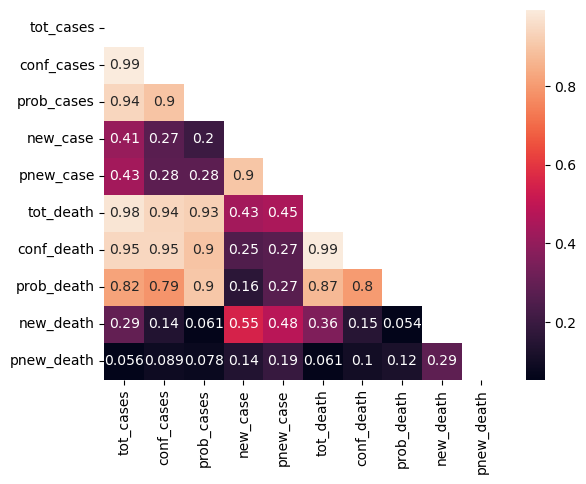

In [53]:
get_corr_by_region("South")

In [64]:
def plot_linear_regression(x_values, y_values, state):
    
    global data_df
    
    data_df_filtered = data_df[data_df["state"]==state]
    data_df_filtered.dropna(inplace=True)
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(data_df_filtered[x_values], data_df_filtered[y_values])
    regress_values = data_df_filtered[x_values] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(data_df_filtered[x_values],data_df_filtered[y_values])
    plt.plot(data_df_filtered[x_values], regress_values, "r-")
    plt.annotate(line_eq,(0,0),fontsize=15, color="red")
    plt.xlabel(x_values)
    plt.ylabel(y_values)
    plt.title(f"Linear Regression between {x_values} and {y_values} on {state} state for COVID-19 cases in 2021")
    plt.savefig("linear_regression.png")
    plt.show()
    
    corr = data_df[[x_values, y_values]].corr()[[x_values]].loc[y_values][0]
    print(f"The correlation between {x_values} and {y_values} on {state} state for COVID-19 cases in 2021 was {round(corr,2)}")

C:\Users\Ana Torres\AppData\Local\Temp\ipykernel_23676\2931162768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_filtered.dropna(inplace=True)


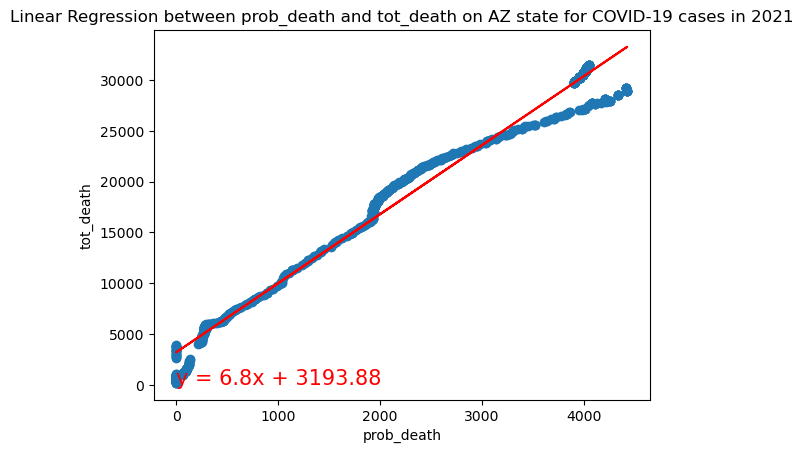

The correlation between prob_death and tot_death on AZ state for COVID-19 cases in 2021 was 0.68


In [55]:
plot_linear_regression("prob_death","tot_death","AZ")